# **Identifikasi Kata Kunci Pada Kalimat yang Mengandung Humor**

**Tafrikhan Rizki Praditya
(2320506018)**

Notebook ini bertujuan untuk membuat model machine learning untuk mengidentifikasi kata yang sering muncul pada kalimat humor dengan model **Gradient Boosting**.

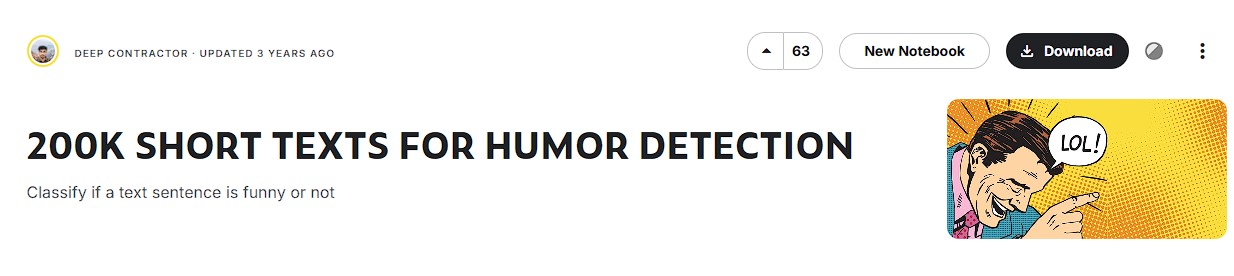

Dataset yang saya gunakan adalah **200K SHORT TEXTS FOR HUMOR DETECTION** dari kaggle [link](https://www.kaggle.com/datasets/deepcontractor/200k-short-texts-for-humor-detection)


### Import Library


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



### Membaca Data


In [ ]:
Humor = pd.read_csv('dataset_humor.csv')
Humor.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False




### Informasi Dataset


In [ ]:
Humor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


### Membuat daftar semua kata yang ada di kolom 'text' pada DataFrame Humor

In [ ]:
Word_list = []
Word_dic = dict()
for i in list(Humor['text']):
    for j in i.split(' '):
        Word_list.append(j.upper())
len(Word_list)

2398856

Blok ini menghitung frekuensi setiap kata dalam dataset dan menyimpan kata-kata tersebut dalam daftar `Word_list`, kemudian mengubahnya menjadi huruf besar.



### Mengimpor Counter


In [ ]:
from collections import Counter

Mengimpor modul `Counter` dari `collections` untuk menghitung frekuensi kata.

### Membuat DataFrame Frekuensi Kata


In [ ]:
Word_dic = Counter(Word_list)
Word_df = pd.DataFrame({'Word':list(Word_dic.keys()),'Frequency':list(Word_dic.values())})
Word_df.sort_values('Frequency',ascending=False,inplace=True)
Word_df.head()

,Word,Frequency
30,THE,81969
22,A,75714
99,TO,53737
20,YOU,34521
60,OF,32837


---



#  Proses Data Cleaning


---

In [ ]:
sync = list(Word_df['Word'].head(60))

Membuat daftar kata-kata yang paling sering muncul (top 60 berdasarkan frekuensi).




### Memfilter Kata Berdasarkan Frekuensi



In [ ]:
Word_df = Word_df[Word_df.Frequency>=333.0]
len(Word_df)

716

Blok ini memfilter kata-kata yang frekuensinya lebih besar atau sama dengan 333, tujuannya untuk menghapus kata yang kurang dari itu, karena dianggap kurang informatif





###  Membersihkan Karakter/Teks Tidak Berguna


In [ ]:
Final_Words = list(Word_df.Word)
Final = [x for x in Final_Words if x not in sync]
len(Final)

658

Tujuannya adalah untuk memfilter kata-kata dalam Final_Words dengan menghapus kata-kata yang ada dalam sync (karena kata yang sering muncul bisa jadi terlalu general)

In [ ]:
for i in ['','-','--','&','3','7','2','A:','6','Q:','...','?','5','10','!','1','9','4','8']:
    Final.remove(i)

Blok ini menghapus karakter yang tidak berguna dari daftar kata.

### Menghitung Jumlah Kata Akhir


In [ ]:
len(Final)

639



---


# Data Prep



---



## Menambahkan Kolom untuk Setiap Kata


In [ ]:
def upp(lis):
    return [j.upper() for j in lis]

for i in Final:
    Humor[i] = Humor['text'].apply(lambda x: 1 if i in upp(x.split(' ')) else 0)
Humor.drop(['text'],axis=1,inplace=True)
Humor.head()

,humor,TRUMP,PEOPLE,AFTER,HER,BY,MAKE,(PHOTOS),INTO,HAS,...,MAJOR,WOMEN'S,STORE,STARS,WEIGHT,MISS,YEAR'S,FOOTBALL,QUESTIONS,BEAT
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Blok ini menambahkan kolom baru untuk setiap kata, dengan nilai 1 jika kata tersebut muncul dalam teks dan 0 jika tidak. Kemudian, menghapus kolom teks asli.

Tujuannya adalah untuk mengubah data teks menjadi numerik yang dapat digunakan oleh algoritma machine learning.

### Menghitung Jumlah Kolom


In [ ]:
len(Humor.columns)

640

### Mengubah Label Humor


In [ ]:
Humor['humor'] = Humor['humor'].apply(lambda x: 1 if x==True else 0)
Humor['humor'].value_counts()

,count
humor,
0,100000
1,100000


Alasan mengubah boolean menjadi 1/0
- 1/0 lebih efisien dalam hal penyimpanan dan komputasi dibandingkan dengan True/False.
- Kebanyakan algoritma machine learning bekerja dengan data numerik.

### Menampilkan DataFrame


In [ ]:
Humor.head()

,humor,TRUMP,PEOPLE,AFTER,HER,BY,MAKE,(PHOTOS),INTO,HAS,...,MAJOR,WOMEN'S,STORE,STARS,WEIGHT,MISS,YEAR'S,FOOTBALL,QUESTIONS,BEAT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Mengimpor Train-Test Split


In [ ]:
from sklearn.model_selection import train_test_split


### Membagi Data untuk Pelatihan dan Pengujian


In [ ]:
X = Humor.drop('humor',axis=1)
y = Humor['humor']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=100)
X_train.head()

,TRUMP,PEOPLE,AFTER,HER,BY,MAKE,(PHOTOS),INTO,HAS,WILL,...,MAJOR,WOMEN'S,STORE,STARS,WEIGHT,MISS,YEAR'S,FOOTBALL,QUESTIONS,BEAT
187939,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20347,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170193,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Blok ini membagi dataset menjadi fitur (X) dan label (y), kemudian membagi data menjadi data pelatihan dan data pengujian dengan proporsi 20% untuk pelatihan dan 80% untuk pengujian.



In [ ]:
y_train.head()

,humor
187939,0
20347,0
12008,0
94349,0
170193,0




---



### Machine Learning dengan Model Gradient Boosting


---





### Mengimpor Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Grid Search CV (Cross-Validation) digunakan untuk menemukan kombinasi hyperparameter terbaik.

# Melatih Model Gradient Boosting


In [ ]:
Model = GradientBoostingClassifier(random_state=100)

params = {'learning_rate':[0.1,0.2,0.3],
          'max_depth':[10,15,20,25,30],
          'max_features':[0.1,0.2,0.25,0.3]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=100), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [10, 15, 20, 25, 30],
                         'max_features': [0.1, 0.2, 0.25, 0.3]},
             scoring='accuracy', verbose=1)


- GridSearchCV digunakan untuk mencari kombinasi hyperparameter terbaik.
- grid_search.fit(X_train,y_train) melatih model dengan berbagai kombinasi hyperparameter dan data pelatihan.


# Menyimpan Model Terbaik Gradient Boosting


In [ ]:
Model_best = grid_search.best_estimator_

Menyimpan model terbaik yang ditemukan oleh GridSearchCV

### Evaluasi Model Gradient Boosting


In [ ]:
y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print('Train accuracy score :',accuracy_score(y_train,y_train_pred))
print('Test accuracy score :',accuracy_score(y_test,y_test_pred))

Train accuracy score : 0.894175
Test accuracy score : 0.798025







---


# Visualisasi dari Output


---



In [ ]:
Feature_Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_Importance.sort_values(by='Importance',ascending=False,inplace=True)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head()

,Importance
Feature,
(PHOTOS),0.032794
TRUMP,0.032416
(VIDEO),0.016307
HEAR,0.012643
DIFFERENCE,0.010835


Membuat DataFrame bernama Feature_Importance yang berisi dua kolom:
- Feature: Nama fitur (kata).
- Importance: Seberapa penting fitur tersebut dalam memprediksi humor.

# Kunci/Fitur Kata Paling Penting dalam Menentukan Humor pada Sebuah Kalimat Berdasarkan Dataset


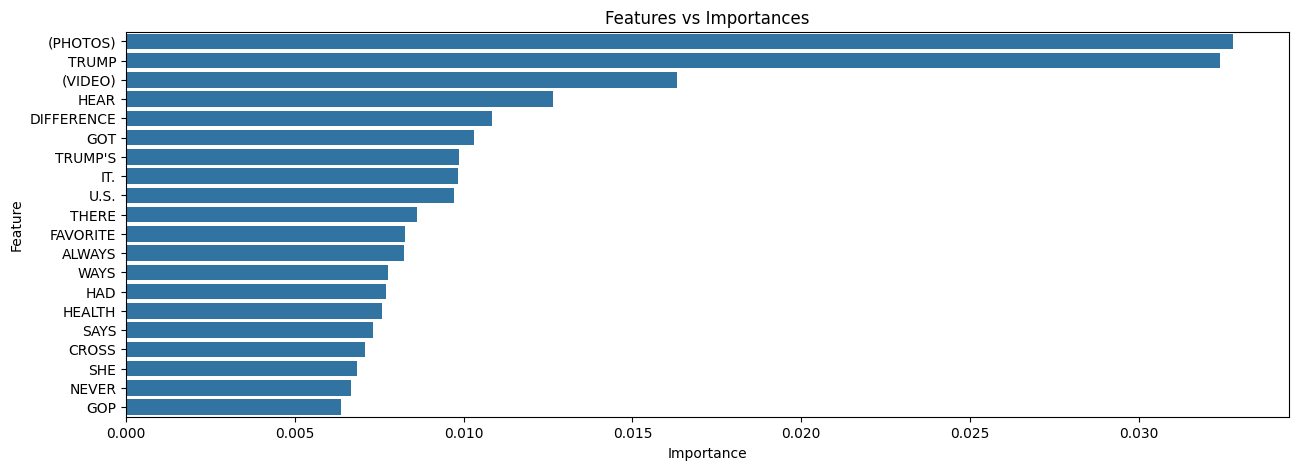

In [ ]:
temp = Feature_Importance.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Importance,y=temp.index)
plt.title('Features vs Importances')
plt.show()



# Kunci/Fitur Kata Paling Tidak Penting dalam Menentukan Humor pada Sebuah Kalimat Berdasarkan Dataset


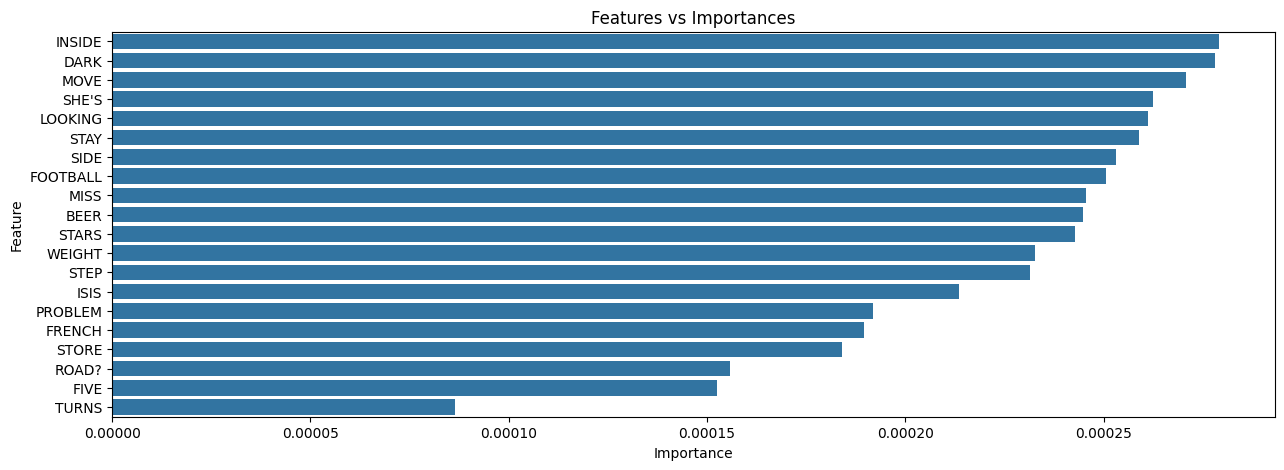

In [ ]:
temp = Feature_Importance.tail(20)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Importance,y=temp.index)
plt.title('Features vs Importances')
plt.show()